# Удержание клиентов сети фитнес-центов

## Постановка задачи

Сеть фитнес-центров разрабатывает стратегию взаимодействия с клиентами. Цель - уменьшить отток клиентов (долю посетителей, прекращающих заниматься в фитнес-центе спустя некоторое время с момента первого визита). Для этого необходимо подготовить план действий по удержанию клиентов. Индикатором оттока для фитнес-центра считается тот факт, что клиент за последний месяц ни разу не посетил спортзал.

Данные, представлнные для анализа содержат анкеты клиентов сети фитнес-центров, переведенные в электронный вид отделом по работе с клиентами. На основании анализа данных о клиентах, необходимо выделить наиболее характерные группы клиентов, а также построить модель прогнозирования фактора оттока того или иного клиента. Кроме того, необходимо понять, какие признаки влияют на отток посетителей, и дать рекомендации по повышению качества работы с клиентами.

## Оглавление

### [Описание данных](#Описание_данных)

### [Загрузка данных. Общая информация](#Загрузка_данных)
- #### [Выводы](#Выводы_1)

### [Исследовательский анализ данных (EDA)](#Исследовательский_анализ_данных)
- #### [Выводы](#Выводы_2)

### [Прогнозирование оттока клиентов](#Прогнозирование_оттока_клиентов)
- #### [Выводы](#Выводы_3)

### [Кластеризация клиентов](#Кластеризация_клиентов)
- #### [Выводы](#Выводы_4)

### [Общий вывод](#Общий_вывод)

<a id='Описание_данных'></a>
## Описание данных

Заказчик из сети фитнес-центов подготовил данные в csv-файле `gym_churn.csv`. В нем содержится информация о клиентах на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:

- `Churn` — факт оттока в текущем месяце;

Данные клиента за предыдущий до проверки факта оттока месяц:
- `gender` — пол;
- `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
- `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- `Phone` — наличие контактного телефона;
- `Age` — возраст;
- `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- `Contract_period` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
- `Group_visits` — факт посещения групповых занятий;
- `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
- `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
- `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

<a id='Загрузка_данных'></a>
## Загрузка данных. Общая информация

Импортируем библиотеки, которые понадобятся на всем протяжении проекта:

In [1]:
# Для работы с датафреймами
import pandas as pd
import numpy as np

# Для графического отображения результатов
import matplotlib.pyplot as plt
import seaborn as sns

# Для решения задач машинного обучения
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

Прочитаем csv-файл с предоставленными данными методом `read_csv`. Датафрейм с данными назовем `df`:

In [2]:
df = pd.read_csv('gym_churn.csv')
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


Данные прочитались корректно. В датафрейме содержится 4 тыс. строк и 14 столбов.

Названия переменных сейчас не имеют единого стандарта: встречается написание как в верхнем, так и нижнем регистре. Чтобы нам было удобно далее работать с датафреймом, приведем все названия колонок к нижнему регистру методом `str.lower()`:

In [3]:
df.columns = df.columns.str.lower()
df

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


Теперь переменные имеют единый формат обозначений.

Получим общую информацию по датасету `df`, вызвав метод `info`:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

Видим, что в данных нет явных пропусков значений - на это указывает число заполненных строк в каждом столбце (везде по 4 000 строк). Типы данных присутствуют следующие:

1) целочисленный тип данных **int** имеют переменные:

 - `gender` - пол;
 - `near_location` - работа/дом поблизости;
 - `partner` - сотрудник компании-партнёра клуба;
 - `promo_friends` - пришел по совету друга;
 - `phone` - наличие телефона в базе;
 - `contract_period` - длительность текущего действующего абонемента (в месяцах);
 - `group_visits` - посещал ли групповые занятия;
 - `age` - возраст;
 - `lifetime` - время с момента первого обращения в фитнес-центр (в месяцах);
 - `churn` - факт оттока в текущем месяце;
 
2) тип **float** имеют переменные:

 - `avg_additional_charges_total` - выручка от других услуг фитнес-центра;
 - `month_to_end_contract` - срок до окончания текущего действующего абонемента (в месяцах);
 - `avg_class_frequency_total` - средняя частота посещений в неделю с начала действия абонемента;
 - `avg_class_frequency_current_month` - средняя частота посещений в неделю за предыдущий месяц.

Практически половина переменных, имеющих целочисленный тип данных по смыслу принимают лишь два значения - 0 и 1. Как, напимер, наличие работы/дома поблизости или факт посещения групповых занятий. Такие переменные могли бы иметь тип данных *boolean*, но именно цифровой формат пригодится нам в дальнейшем для использования признаков клиентов в ходе обучения алгоритмов прогнозирования оттока посетителей. Поэтому дополнительных преобразований типов данных производить не будем - текущие типы данных соответсвуют смысловому содержанию переменных.

Проверим данные на наличие полных дубликатов строк. Количество дубликов сосчитаем сочетанием методов `duplicated().sum()`:

In [5]:
df.duplicated().sum()

0

Задублированных строк в датафрейме нет.

Подведем итоги первичного знакомства с данными.

<a id='Выводы_1'></a>
### Выводы

В текущем разделе мы произвели первичное знакомство с данным клиентской базы сети фитнес-центов. Для анализа предоставлены анкеты 4 000 клиентов, по каждому из которых известно 14 уникальных характеристик.

Название фигурирующих в датафрейме переменных мы для удобства привели к единому формату записи - в нижнем регистре. Убедились, что типы данных переменных соответствуют их смысловым значениям, в данных отсутствуют пропуски и дубликаты строк.

Перейдем далее к изучению характерных значений переменных и распределений признаков клиентов.

<a id='Исследовательский_анализ_данных'></a>
## Исследовательский анализ данных (EDA)

Изучим характерные значения и распределения переменных-признаков клиентов.

Для начала посмотрим, какие значения принимают целочисленные переменные. Для этого вызовем в цикле ко всем целочисленным столбцам датафрейма `df` метод `value_counts`. С помощью параметра `normalize=True` выдевем процент клиентов со значенями признаков каждого вида:

In [6]:
for column in df.columns:
    if df[column].dtype == 'int64':
        print(column)
        print(df[column].value_counts(normalize=True))

gender
1    0.51025
0    0.48975
Name: gender, dtype: float64
near_location
1    0.84525
0    0.15475
Name: near_location, dtype: float64
partner
0    0.51325
1    0.48675
Name: partner, dtype: float64
promo_friends
0    0.6915
1    0.3085
Name: promo_friends, dtype: float64
phone
1    0.9035
0    0.0965
Name: phone, dtype: float64
contract_period
1     0.55175
12    0.24000
6     0.20825
Name: contract_period, dtype: float64
group_visits
0    0.58775
1    0.41225
Name: group_visits, dtype: float64
age
29    0.11700
30    0.11425
28    0.11175
31    0.10850
27    0.09450
32    0.09100
26    0.07500
33    0.06325
25    0.05775
34    0.04350
24    0.03700
35    0.02450
23    0.02050
36    0.01200
22    0.00825
37    0.00725
21    0.00600
20    0.00350
38    0.00250
39    0.00075
19    0.00050
18    0.00050
41    0.00025
Name: age, dtype: float64
lifetime
1     0.21075
2     0.15250
3     0.12250
0     0.12175
4     0.09575
5     0.06825
6     0.05500
7     0.04175
8     0.02775
9     0.0

Как мы отмечали выше, часть признаков бинарны - принимают значения либо 0, либо 1. Среди небинарных переменных - возраст `age`, период взаимодействия с компанией `lifetime` и срок действия абонемента `contract_period`.

Возраст клиентов изменяется от 18 до 41 года. Наиболее представительный возраст - 28-31 года. По длительности взаимодействия клиентов с сетью фитнес-центров можно сказать, что большая часть клиентов знакомы с компанией недавно - от 0 до 3 полных месяцев (порядка 60% всех клиентов).

Абонементы посетители приобретают чаще всего на 1 месяц, но также встречаются покупки абонементов на 6 и на 12 месяцев.

При этом факт оттока зафиксирован у 27% всех клиентов.

Чтобы лучше проанализировать доли тех или иных пользователей, а также оценить распределение непрерывных величин, вызовем метод `describe` сразу для всего датафрейма:

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


В случае бинарных величин среднее значение `mean` показывает долю клиентов с признаком, принимающим значение 1. Так видим, что доли мужчин и женщин практически равны: 51% против 49%.

Работа или место жительства находятся рядом с фитнес-клубом у 85% клиентов. Судя по всему, этот фактор важен для посетителей. По партнерской программе пришло 49% клиентов, 31% - по рекомендации знакомого.

Телефонные номера предоставили 90% клиентов. Это хорошо. С большей частью клиентов можно будет связаться, если это понадобится. Например, для оповещения о предложениях и акциях.

Групповые занятия посещает 41% клиентов - такой вид занятий довольно популярен.

Теперь обратим внимание на небинарные переменные:

- Средний период действия абонемента - 4,7 месяца, медиана - 1 месяц, что говорит о смещении распределения абонементов в сторону менее продолжительных. Мы уже отмечали, что абонементы на 1 месяц наиболее популярны.


- Средний возраст клиентов - 29 лет, медиана такая же, что говорит о близости распределения возраста клиентов к нормальному. Убедимся в этом чуть позже, когда построим гистограммы и другие графики.


- Выручка от неосновных услуг финтес-центов варьируется от 0,15 до 553 усл. ед. и по медиане составляет 136 усл. ед, а в среднем - 147 усл. ед.


- Медиана срока, через который текущий абонемент закончится равна 1 месяцу, что логично, если клиенты предпочитают приобретать абонементы на один месяц.


- Среднее время знакомства клиентов с компанией составляет 3,7 месяца, а по медиане - 3 месяца. Но есть клиенты, которые узнали о сети фитнес-центов довольно давно - 31 месяц назад (или 2,6 года).


- Средняя частота посещений фитнес-центов в неделю варьируется от 1,8 до 6,1 раза. Среднее составляет 1,8 раза в неделю. Показатели для текущего месяца по посещаемости чуть выше (до 1,9 раза в неделю), но это может быть связано с небольшим количеством статистики.

Основные представления о значениях признаков в данных мы сформировали. Далее посмотрим как средние значения признаков отличаются в зависимости от того, попал клиент в отток или нет. Поделим всех посетителей на две группы - кто уже месяц не посещал фитнес-центы и считается ушедшим и тех, кто не отнесен к описанной группе. Осуществим разбиение на группы методом `groupby`. Для каждой группы клиентов посчитаем средние значения всех признаков методом `mean`:

In [8]:
df_churn = df.groupby('churn').mean().reset_index()

# Добавим столбец-интекс со смысловым описанием групп клиентов. Далее будем использовать его для подписи графиков
df_churn['churn_text'] = ['не попали в отток', 'попали в отток']
df_churn = df_churn.set_index('churn_text')
df_churn

,churn,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn_text,,,,,,,,,,,,,,
не попали в отток,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
попали в отток,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Можно отметить, что отличия в распеределении клиентов по полу в двух выделенных группах практически отсутствуют (в обеих доля `gender=1` составляет порядка 51%). Доля клиентов, у которых поблизости есть дом или работа, а также тех, кто пришел из компании-партнера, ниже в группе "оттока". Можно предположить, что клиенты-сотрудники компаний-партнеров и клиенты, проживающие/работающие рядом, менее других склонны забрасывать посещение фитнес-цента. Что, вероятно, также справедливо и для клиентов, пришедших по рекомендации знакомых. Доля клиентов, пришедших по приглашению, ниже в группе оттока (на 17%).

Средняя длительнось абонементов в группе оттока ниже в 3 раза. Почти в 2 раза ниже доля клиентов, посетивших групповые занятие. Также значительно ниже срок, оставшийся до окончания действующего абонемента. Все эти признаки могут коррелировать с фактором оттока клиентов. Также клиентов, попавших в отток, отличает недолгое знакомство с компанией (1 месяц), относительно низкая частота посещений занятий (1,0-1,5 раз в неделю против 2 раз в неделю в группе не попавших в отток) и менее затратные покупки неосновных товаров/услуг фитнес-цента.

Чтобы лучше проанализировать отличия клиентов, попавших в отток и нет, визуализируем наблюдаемые признаки. Для бинарных переменных построим диаграммы `barplot`, а для остальных признаков - гистограммы распределения методом `distplot` библиотеки `seaborn`:

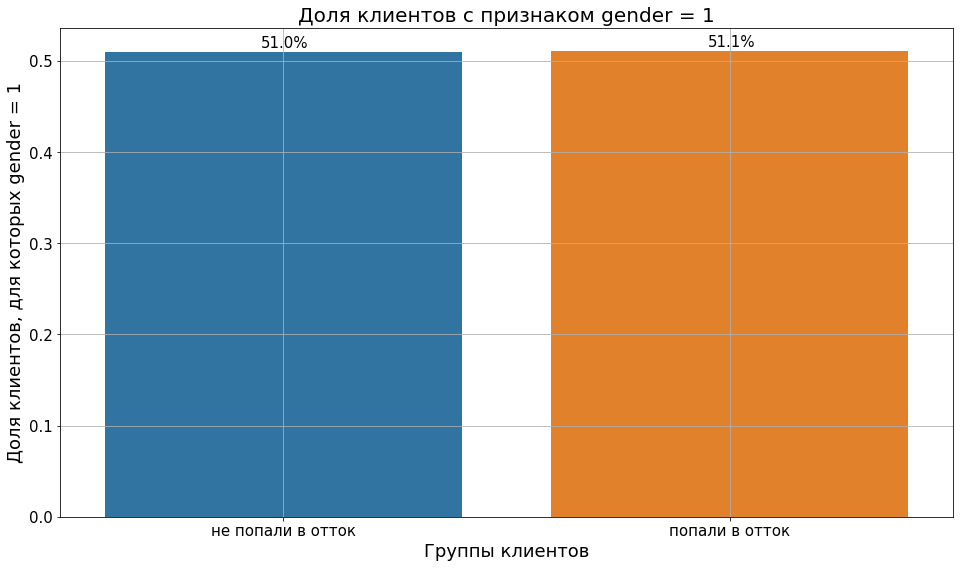

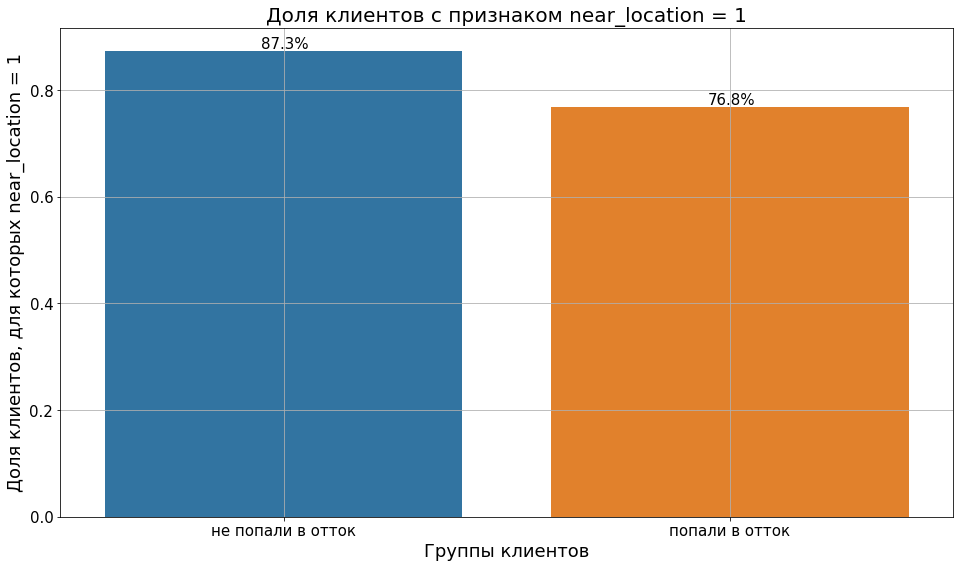

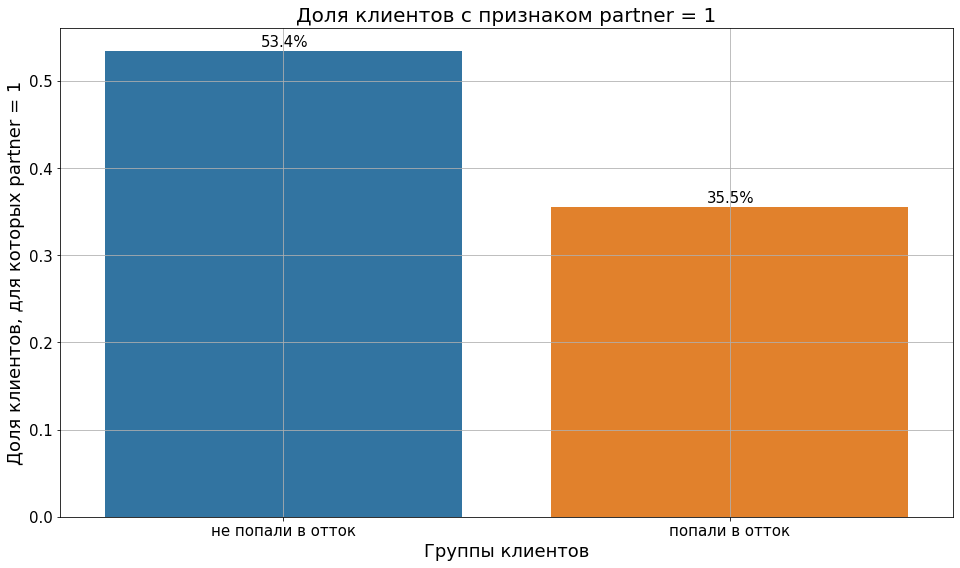

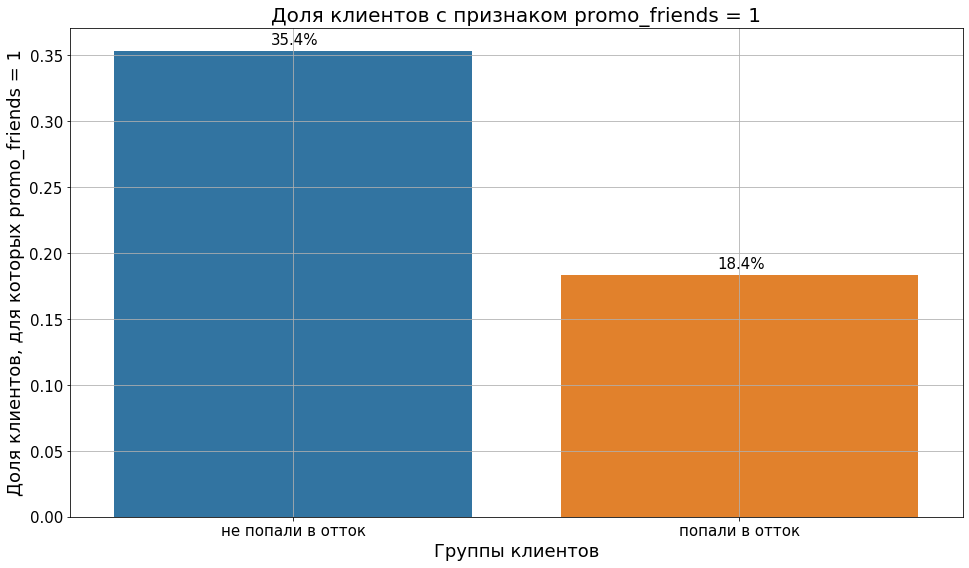

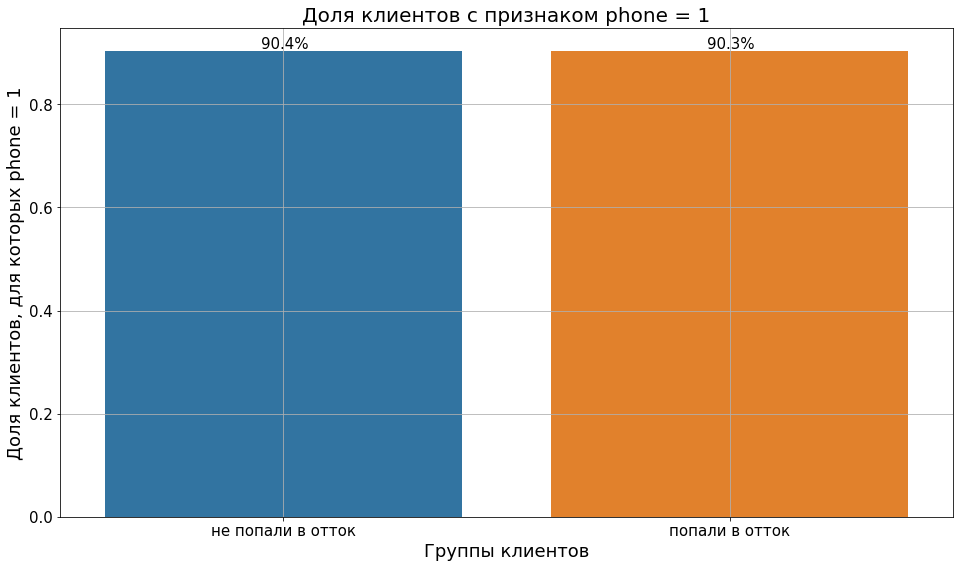

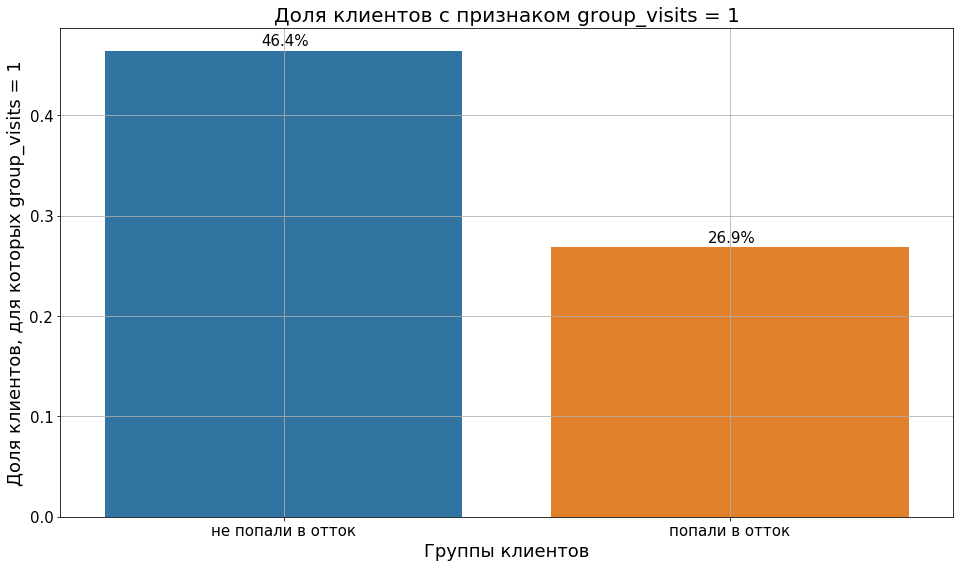

In [9]:
# Выделим группу бинарных признаков. Для них строим столбчатые диаграммы.
binar_features = ['gender', 'near_location', 'partner', 'promo_friends', 
                  'phone', 'group_visits']

# В цикле проходим по всем бинарным переменным и строим соответствующие графики.
for feature in binar_features:
    plt.figure(figsize=(16, 9))
    plt.rcParams['font.size'] = '15'

    sns.barplot(x=df_churn.index, y=feature, data=df_churn)

    plt.title('Доля клиентов с признаком %s = 1' %feature, fontsize=20)
    plt.ylabel('Доля клиентов, для которых %s = 1' %feature, fontsize=18)
    plt.xlabel('Группы клиентов', fontsize=18)
    
    # Добавляем на графики подписи процентного отношения клиентов, для которых бинарный признак принимает
    # значение 1.
    plt.text(-0.05, df_churn[feature][0] + 0.005, '{:0.1%}'.format(df_churn[feature][0]))
    plt.text(0.95, df_churn[feature][1] + 0.005, '{:0.1%}'.format(df_churn[feature][1]))
    plt.grid()

    plt.show()

Распределение по полу, а также доли клиентов, оставивших свои контактные данные, практически не отличаются в двух группах. Наличие поблизости работы или дома отличается на 10,5% (ниже в группе оттока). Следующие три признака довольно сильно занижены в группе оттока, по сравнению с группой остальных клиентов: 

- число клиентов, пришедших по партнерской программе компании-работодателя (ниже в группе оттока на 18%); 

- доля клиентов, пришедших по совету друзей (ниже на 17%);

- доля клиентов, посетивших групповые занятия (ниже на 19,5%).

Вероятно, отличия в указанных признаках от среднего значения по клиентам, не попавшим в отток, помогут далее спрогнозировать вероятность ухода клиента из сети фитнес-центов.

Теперь построим распределения остальных признаков в зависимости от группы клиентов. Воспользуемся методом `distplot`:

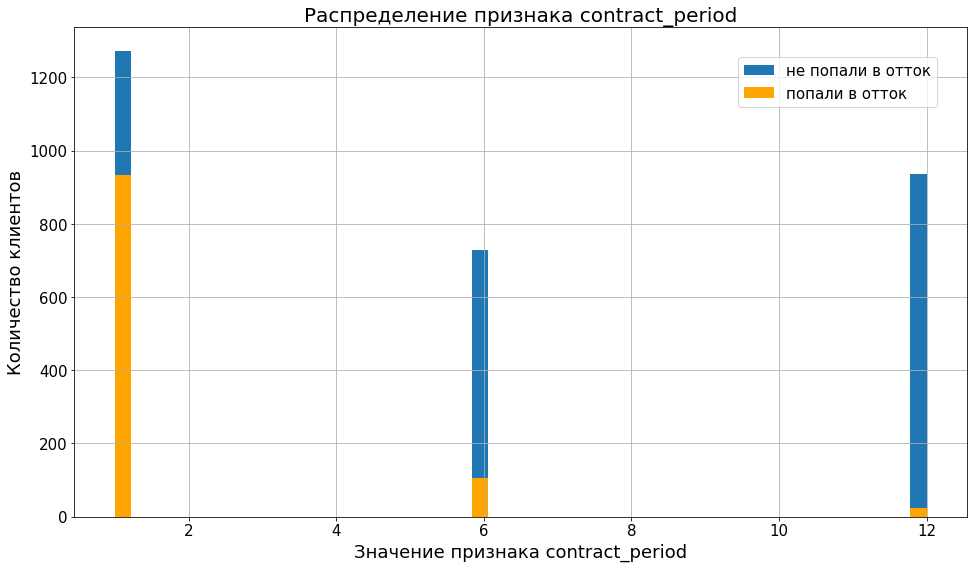

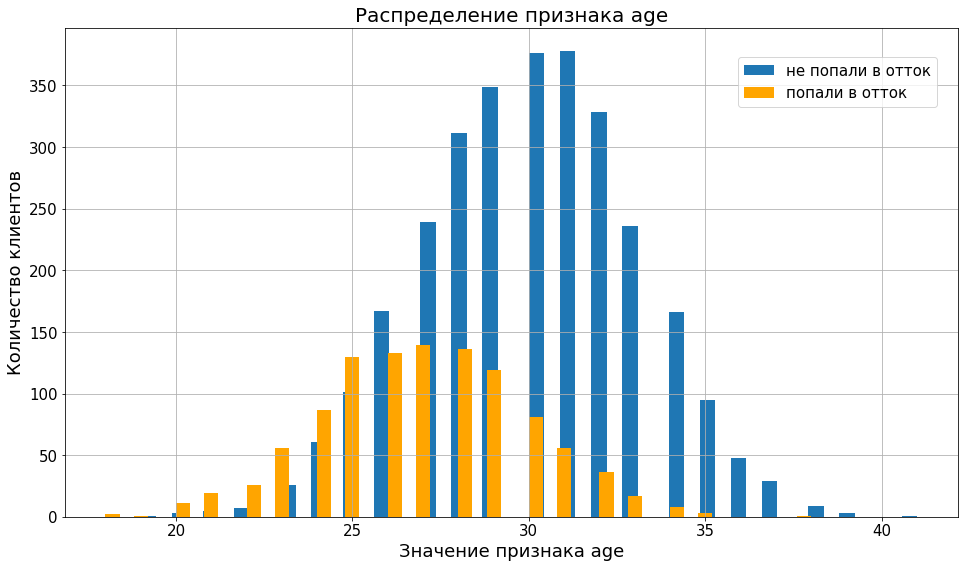

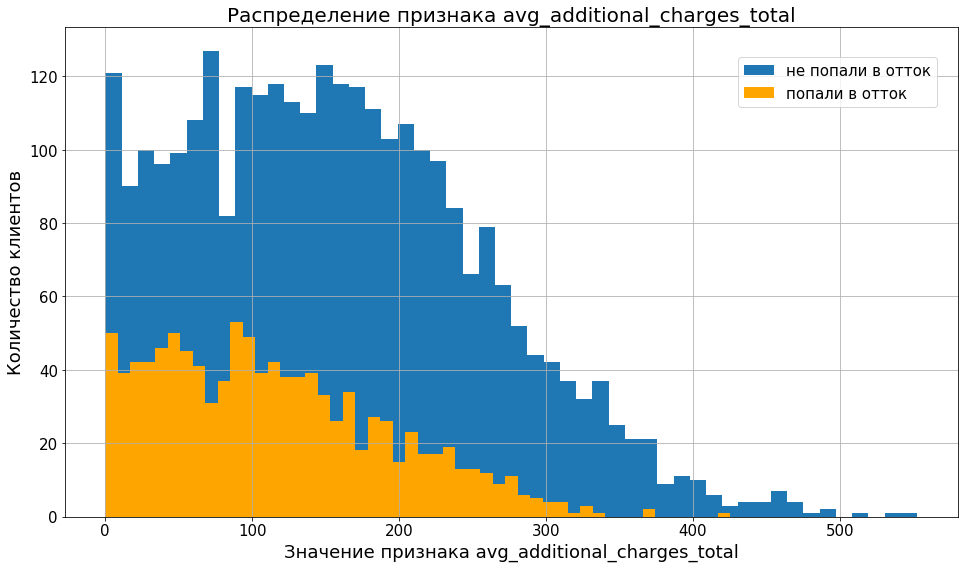

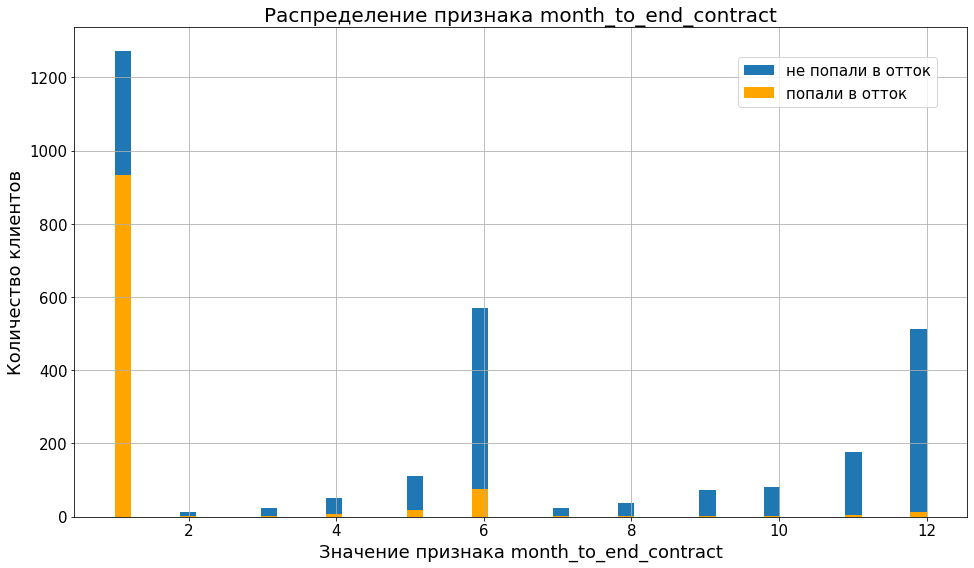

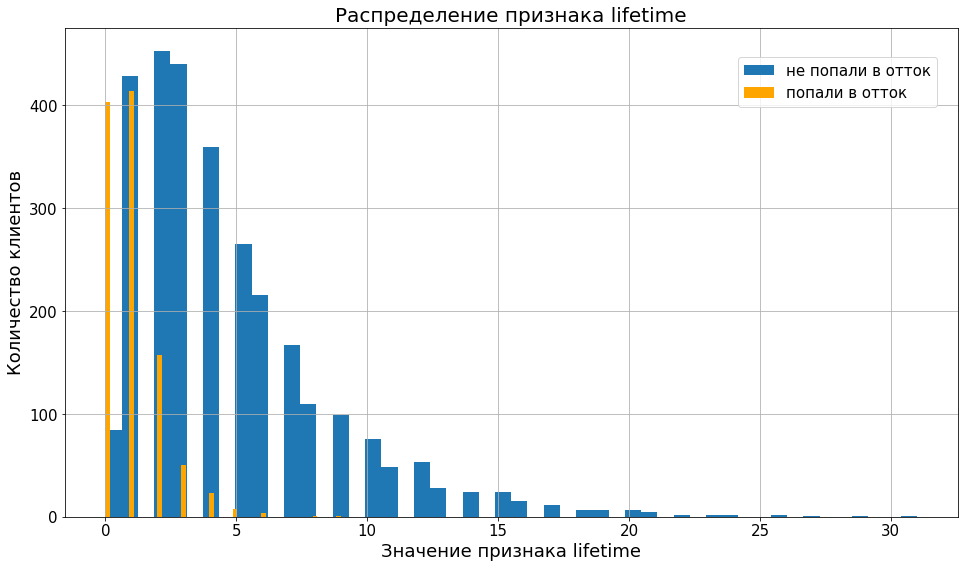

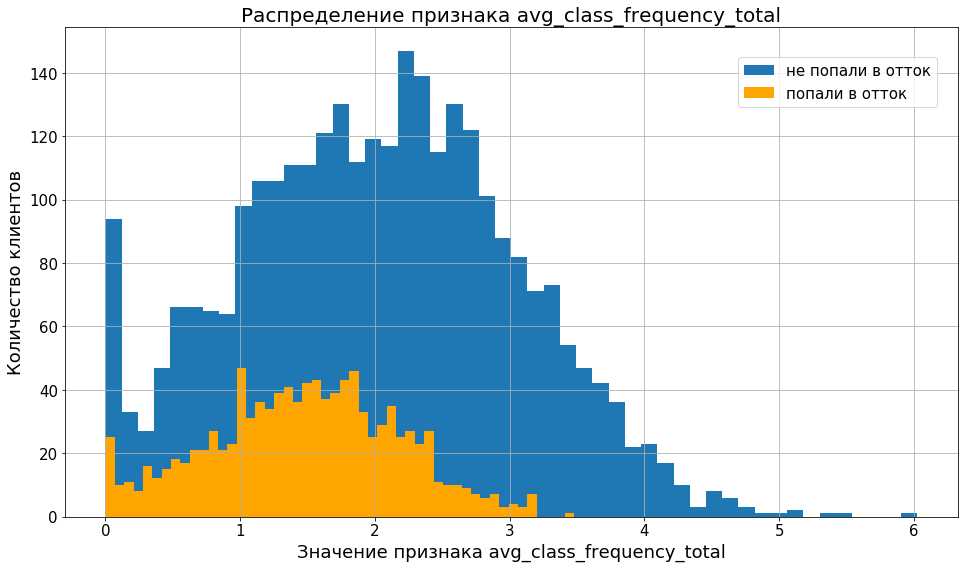

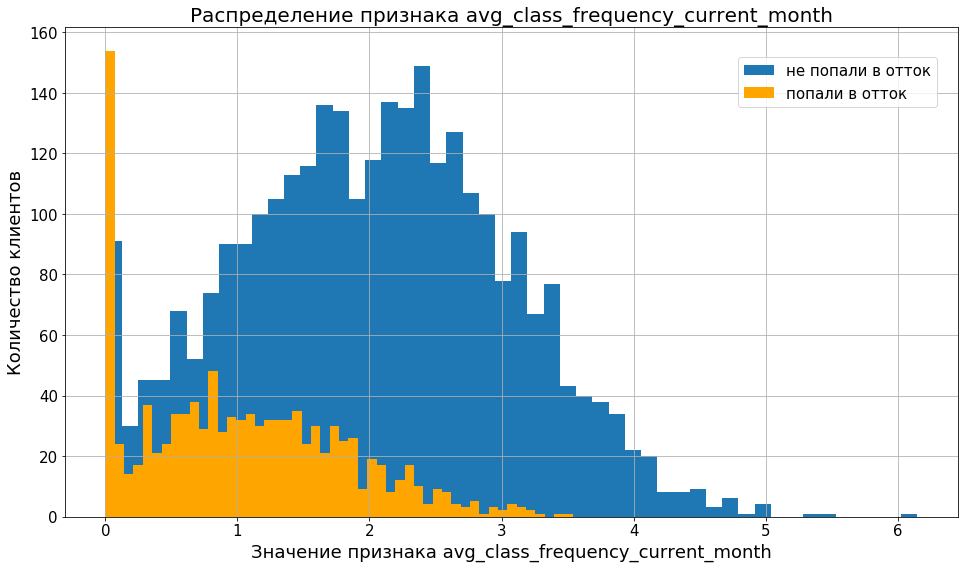

In [10]:
# Перечислим все интересующие нас небинарные признаки
not_binar_features = ['contract_period', 'age', 'avg_additional_charges_total', 
                      'month_to_end_contract', 'lifetime', 'avg_class_frequency_total',
                      'avg_class_frequency_current_month']

# В цикле построим графики распределений каждой переменной в двух группах клиентов: группе "оттока" и 
# группе клиентов, не попавших в отток.
for feature in not_binar_features:
    fig = plt.figure(figsize=(16, 9))

    # При построении распределения делам срез данных по параметру churn.
    sns.distplot(df[df['churn']==0][feature], kde=False, bins=50, hist_kws={'alpha':1})
    sns.distplot(df[df['churn']==1][feature], kde=False, bins=50, color='orange', 
                 hist_kws={'alpha':1})
    fig.legend(labels=['не попали в отток', 'попали в отток'], loc='right', 
               bbox_to_anchor=(0.82, 0.75))

    plt.title('Распределение признака %s' %feature, fontsize=20)
    plt.ylabel('Количество клиентов', fontsize=18)
    plt.xlabel('Значение признака %s' %feature, fontsize=18)
    plt.grid()

    plt.show()

Охарактеризуем полученные графики распределений признаков клиентов:

1) На графике распределения периода действия текущего абонемента видно, как мы отмечали ранее, что для тех, кто попал в отток наиболее характерно приобретение абоменента на один месяц. Среди тех, кто продолжает пользваться услугами фитнес-цента также достаточно популярны абонементы на 12 месяцев. А вот в группе оттока клиентов с такими абонементами весьма немного.

2) До окончания абонемента, как правило, остается не больше месяца на момент ухода клиента из сети фитнес-центров. Этот факт согласуется с выводами предыдущекого пункта.

3) Распределение возраста в обеих группах походит на нормальное, с тем лишь отличием, что в группе оттока значение среднего возраста смещено в более молодой возраст (27-28 лет), относительно группы не в оттоке (средний возраст - 30-31 год).

4) Распределения выручки от дополнительных товаров сети фитнес-центров в обеих группах скошены вправо (есть выбросы крупных покупок). Среднее значение затрат выше в группе не попавших в отток.

5) Походие зависимоти наблюдаются и для времени `lifetime` знакомства клиентов с компанией. Для клиентов из группы оттока наиболее характерный период взаимодействия с компанией 0-1 месяц.

6) Частота посещений финтес-центра у клиентов, попавших в отток ниже. А распределения этого рапаметра скошены вправо для обеих групп. Однако для текущего месяца в группе оттока виден всплеск численности клиентов очень редко посещавших фитнес-центр. Скорее всего клиентам проще принять решение о прекращении пользования услугами фитнес-центра, если они уже несколько недель не посещают его. Стоит подумать о том, как вернуть таких клиентов, пока они полностью не оставили идею заниматься спортом в этой сети центров.

Чтобы подтвердить наши догадки о взаимной корреляции некоторых признаков, рассчитаем и отобразим матрицу корреляций по значением переменных датафрейма `df`:

In [11]:
cm = df.corr()
cm

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


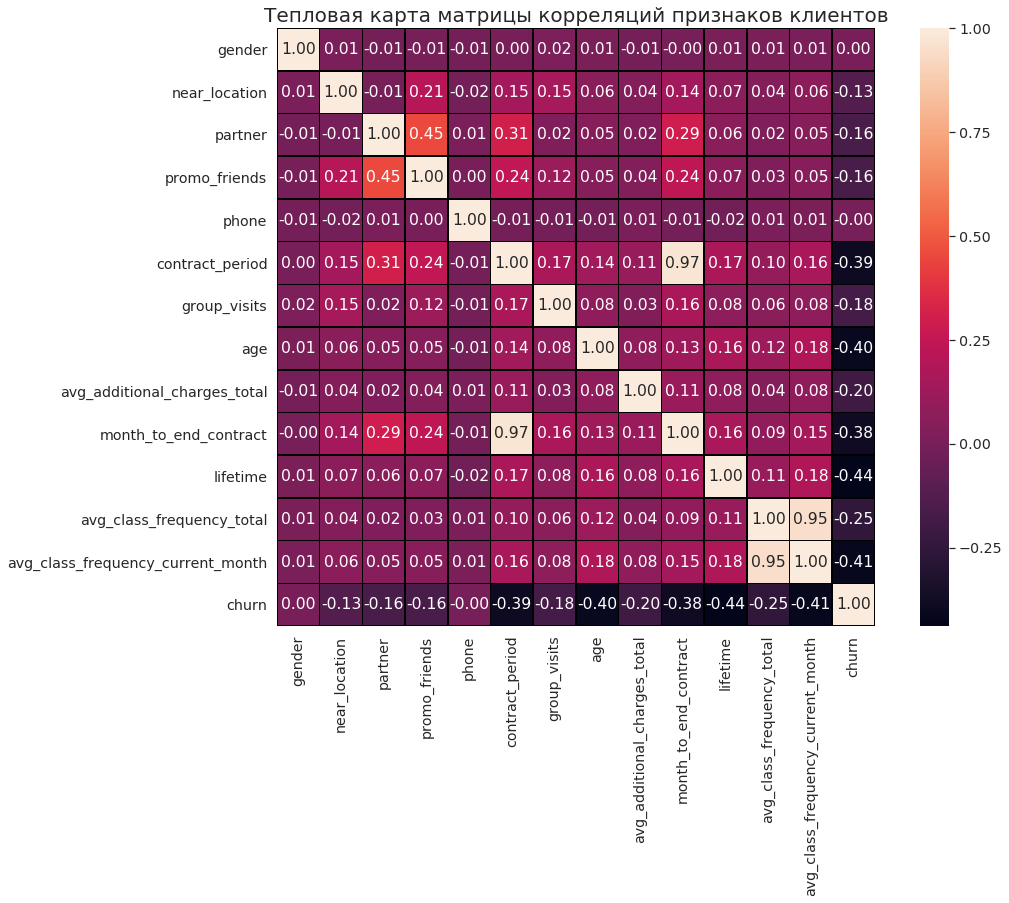

In [12]:
# Задаем параметры отображения тепловой карты на базе матрицы корреляций признаков клиентов.
sns.set(style='white', font_scale=1.3)
plt.figure(figsize=(16, 11))
sns.heatmap(cm, annot = True, square=True, fmt ='.2f', linewidths=0.5, linecolor='black')
plt.title('Тепловая карта матрицы корреляций признаков клиентов', fontsize=20)

plt.show()

По визуализированной матрице попарных корреляций переменных-признаков можно видеть, что переменная `churn` или фактор оттока клиентов более всего коррелирует с небольшим временем клиента в сети фитнес-центров (уходят чаще в первые месяцы знакомства с компанией), с редким посещением фитнес-центра в месяц оттока, с возрастом клиентов и с малым периодом действия абонемента.

Также можно заметить, что параметры `cuntract_period` и `month_to_end_contract`, а также `avg_class_frequency_total` и `avg_class_frequency_current_month` сильно коррелируют между собой. Т.е. для прогнозирования фактора оттока будет достаточно оценить один из параметров каждого вида.

Подведем основные итоги исследовательского анализа данных (EDA).

<a id='Выводы_2'></a>
### Выводы

В данном разделе мы исследовали характерные значения, принимаемые переменными-признаками клиентов фитнес-центров. Оценили средние и медианные значения признаков, построили гистограммы распределений для небинарных величин и столбцатые диаграммы для бинарных характеристик.

В ходе изучения полученных распределений удалось установить следующее:

- Факт оттока зафиксирован у 27% всех клиентов;

- Доли мужчин и женщин практически равны: 51% против 49%;

- Возраст клиентов изменяется от 18 до 41 года. Средний возраст клиентов - 29 лет. Распределение клиентов по возрасту близко к нормальному;

- Абонементы посетители приобретают чаще всего на 1 месяц, но также встречаются покупки абонементов на 6 и на 12 месяцев. Средний период действия абонемента - 4,7 месяца, медиана - 1 месяц;

- Работа или место жительства находятся рядом с фитнес-клубом у 85% клиентов;

- По партнерской программе пришло 49% клиентов, 31% - по рекомендации знакомого;

- Групповые занятия посещает 41% клиентов - такой вид занятий довольно популярен;

- Среднее время знакомства клиентов с компанией составляет 3,7 месяца, а по медиане - 3 месяца. Но есть клиенты, которые узнали о сети фитнес-центов довольно давно - 31 месяц назад (или 2,6 года);

- Средняя частота посещений фитнес-центов в неделю варьируется от 1,8 до 6,1 раза. Среднее составляет 1,8 раза в неделю. Показатели для текущего месяца по посещаемости чуть выше (до 1,9 раза в неделю).

Далее были проанализированы те же признаки но в разрезе групп клиентов - попавших в отток и нет. Выяснились следующие особенности, наблюдаемые в группе оттока:

1) Средняя длительнось абонементов в группе оттока ниже в 3 раза. 

2) Почти в 2 раза ниже доля клиентов, посетивших групповые занятие. 

3) Также клиентов, попавших в отток, отличает недолгое знакомство с компанией (1 месяц), относительно низкая частота посещений занятий (1,0-1,5 раз в неделю против 2 раз в неделю в группе не попавших в отток) и менее затратные покупки неосновных товаров/услуг фитнес-цента.

4) Наличие поблизости работы или дома отличается на 10,5% (ниже в группе оттока).

5) Число клиентов, пришедших по партнерской программе компании-работодателя ниже в группе оттока на 18%, по совету друзей - ниже на 17%, посетивших групповые занятия - ниже на 19,5%.

6) В группе оттока значение среднего возраста смещено в более молодой возраст (27-28 лет), относительно группы не попавших в отток (средний возраст здесь - 30-31 год).

Чтобы разобраться, какие же именно признаки наиболее скоррелированы с фактором оттока клиентов, мы построили и визуализировали матрицу корреляций признаков. Согласно ей, фактор оттока клиентов более всего коррелирует с небольшим временем клиента в сети фитнес-центров (уходят чаще в первые месяцы знакомства с компанией), с редким посещением фитнес-центра в месяц оттока, с возрастом клиентов и с малым периодом действия абонемента.

Также построение матрицы корреляций показало, что две пары признаков сильно скоррелированы между собой. Это  параметры: срок действия текущего абонемента и срок окончания действия абонемента, а также средняя частота посещения занятий за весь период знакомства с компанией и средняя частота посещений в текущем месяце.

Запомнив основные выводы исследовательского анализа данных, перейдем к разделу, посвященному прогнозированию оттока клиентов.

<a id='Прогнозирование_оттока_клиентов'></a>
## Прогнозирование оттока клиентов

Поскольку нам требуется спрогнозировать по известным признакам фактор оттока клиентов, будем применять для этой цели алгоритмы бинарной классификации: 0 - клиент не попал в отток, 1 - клиент ушел.

В данном разделе протестируем работу двух алгоритмов машинного обучения из класса алгоритмов "обучение с учителем": логическая регрессия и классификация случайным лесом. Все имеющиеся данные по признакам клиентов разделим на две подвыборки - обучающую и тестовую. После чего проведем стандартизацию значений признаков (это избавит от влияния выбросов в ряде характеристик) и обучим каждую из выбранных моделей. Далее с помощью каждой из моделей получим прогноз классификации на тестовой выборке. В конце раздела сравним модели, опираясь на такие метрики, как `accuracy` (доля правильных ответов), `precision` (точность) и `recall` (полнота).

Приступим. Зададим матрицу объектов-признаков и вектор целевой переменной - фактора оттока. После чего разделим данные на обучающую и тестовую подвыборки методом `train_test_split`:

In [13]:
# Задаем матрицу объект-признак
X = df.drop('churn', axis=1)

# Задаем вектор целевой переменной - фактора оттока
y = df['churn']

# Разделяем данные на обучающую и тестувую выбрки в отношении 80% к 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Стандартизуем данные методом `StandardScaler`:

In [14]:
# Обучаем StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуем обучающую и валидационную выборки к стандартизованному виду
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

Зададим модель логической регрессии, обучим ее и рассчитаем следующие параметры на тестовой выборке: долю правильных ответов `accuracy`, точность `precision` и полноту `recall` этой модели.

In [15]:
# Задаем модель логической регрессии
lr_model = LogisticRegression(random_state=0, solver='lbfgs')

# Обучаем модель на train-выборке
lr_model.fit(X_train_st, y_train)

# Получаем вектор-прогноз для тестовой выборки
lr_y_pred = lr_model.predict(X_test_st)

# Рассчитываем метрики модели логической регрессии
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred)
lr_recall = recall_score(y_test, lr_y_pred)

# Выводим значение метрик
print('Accuracy логической регрессии:', lr_accuracy.round(4), '\n',
      'Precision логической регрессии:', lr_precision.round(4), '\n',
      'Recall логической регрессии:', lr_recall.round(4))

Accuracy логической регрессии: 0.9225 
 Precision логической регрессии: 0.8542 
 Recall логической регрессии: 0.8283


Тут стоит отметить, что метрика `accuracy` наиболее применима для оценки алгоритма в случае, когда в исходной выборке доли подвыборок с `churn = 0` и `churn = 1` пимерно равны. В нашем датасете отток наблюдается лишь у 27% клиентов, поэтому оценивать качество модели лучше по метрикам `precision` и `recall`.

Точность `precision` характеризует долю правильных ответов среди класса `churn = 1`, а полнота `recall` указывает какую долю реально ушедших клиентов `churn = 1` мы смогли спрогнозировать моделью.

В нашей задаче по удержанию клиентов важно определить на ранней стадии вероятность клиента попасть в отток и постараться это предотвратить. Поэтому оценивать качество модели логичнее всего по метрике полноты `recall`. Для модели логической регрессии она составила 83% - на стольких клиентов, близких к оттоку мы смогли бы повлиять программой по удержанию клиентов.

Теперь обратимся к алгоритму классификации случайным лесом. Зададим модель, обучим ее на train-выборке, получим прогноз на тестовой выборке и оценим упомянутые выше метрики:

In [16]:
# Задаем модель классификации случайным лесом
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0)

# Обучаем модель на train-выборке
rf_model.fit(X_train_st, y_train)

# Получаем вектор-прогноз для тестовой выборки
rf_y_pred = rf_model.predict(X_test_st)

# Рассчитываем метрики модели случайного леса
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)

print('Accuracy случайного леса:', rf_accuracy.round(4), '\n',
      'Precision случайного леса:', rf_precision.round(4), '\n',
      'Recall случайного леса:', rf_recall.round(4))

Accuracy случайного леса: 0.915 
 Precision случайного леса: 0.8385 
 Recall случайного леса: 0.8131


По значения метрик видим, что модель случайного леса показала себя немного хуже по всем трем показателям, в том числе и по полноте `recall` (81%). В связи с этим, стоит отдать предпочтение прогнозированию оттока клиентов по средством модели логической регрессии (среди рассмотренных двух алгоритмов обучения с учителем).

Подведем итоги прогнозирования оттока клиентов алгоритмами обучения с учителем.

<a id='Выводы_3'></a>
### Выводы

Для нашей задачи бинарной классификации (прогнозирования попадет клиент в отток или нет) мы протестировали два алгоритма обучения с учителем: логическую регрессию и случайный лес. 

Имеющаяся выборка клиентов была разбита на две подвыборки - обучающую и тестовую - в отношении 80% к 20%, соответственно. Прежде, чем обучать модели, мы провели стандартизацию данных, что позволило уменьшить влияние выбросов величин, изменяющихся в широких диапазах (как возраст клиентов или выручка от побочных товаров фитнес-центров).

Далее было произведено обучение обеих упомянутых моделей на train-выборке и рассчет прогноза вектора целевой переменной на тестовой выборке. Результирующий вектор-прогноз сравнивался с реальными значениями фактора оттока в тестовой выборке. В качестве метрик оценки качества моделей рассчитывались метрики `accuracy` (доля правильных ответов), `precision` (точность) и `recall` (полнота модели). Были даны пояснения по смысловым характеристикам каждой из метрик.

По результатам сравнения двух алгоритмов, было показано, что для задачи определения оттока клиентов для сети фитнес-центров лучше показала себя модель логической регрессии. Ее метрика `recall` достигает 83%, что означает, что по средством этой модели удастся спрогнозировать отток большой доли потенциально "уходящих" клиентов. Что в свою очередь, можно будет использовать в программе по удержанию клиентов.

В следующем разделе обратимся к алгоритмам обучения без учителя и попробуем выделить классы клиентов, схожие по группе признаков. Вероятно, среди классов удастся выделить какой-то, где клиенты более склонны к оттоку.

<a id='Кластеризация_клиентов'></a>
## Кластеризация клиентов

В этой части проекта обратимся к алгоритмам обучения без учителя. Основная цель - выделить кластеры клиентов, отичающиеся между собой по характерным значениям признаков. Если алгоритм сможет при этом выделить кластер с высокой долей клиентов, уходящих в отток, то мы сможем оценить, какими другими характерными признаками обладают клиенты из этого кластера. Таким образом, мы потенциально можем связать фактор оттока в другими характеристиками клиентов и спрогнозировать, кого именно стоит включать в программу удержания клиентов.

Начнем работу с алгоритма агломеративной кластеризации. Этот алгоритм основан на построении матрицы расстояний между объектами-признаками. С помощью такой матрицы можно последовательно объединять близкие кластеры, а результат визуализировать на графике-дендрограмме. 

Для осуществления алгоритма агломеративной кластеризации предварительно стандартизируем данные о признаках клиентов:

In [17]:
# Стандартизируем данные
sc = StandardScaler()

# Делаем срез датафрейма, не учитывая столбец churn
X_sc = sc.fit_transform(df.drop('churn', axis=1))

# Получаем таблицу "связок" признаков клиентов
linked = linkage(X_sc, method = 'ward')

Отобразим дендрограмму признаков клиентов:

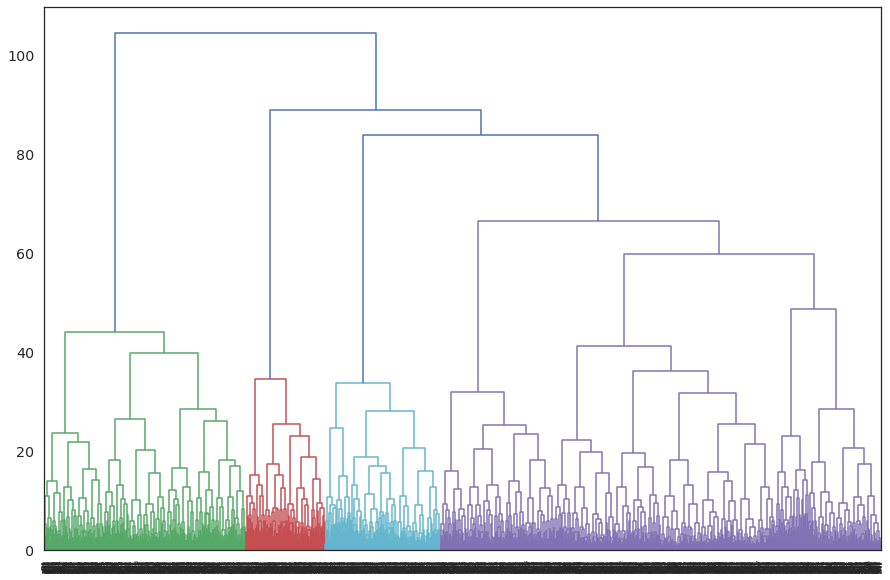

In [18]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show()

На дендограмме различными цветами выделены рекомендованные кластеры. Их четыре. Последний выглядит наиболее объемным.

Теперь обратимся к другому алгоритму - K-means. Он выделяет в выборке заранее заданное число кластеров. Разобьем всех клиентов на пять кластеров (такое число кластеров рекомендовано в описании задач проекта):

In [19]:
# Задаем метод и желаемое число кластеров
km = KMeans(n_clusters = 5, random_state = 0)

# Получаем "лейблы" кластеров и сохраняем их в переменную
labels = km.fit_predict(X_sc)

# Добавляем в датафрейму столбец номера кластера
df['cluster_km'] = labels
df

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1,3
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0,0


Оценим, сильно ли различаются средние значения признаков в выделенных кластерах клиентов. Применим метод группировки `groupby`. Чтобы понимать о каком количестве клиентов идет речь в каждом кластере добавим такой столбец в сгруппированный датасет:

In [20]:
# Подсчитываем число клиентов в каждом кластере
clients_count = df['cluster_km'].value_counts().reset_index()
clients_count.columns = ['cluster_km', 'clients_count']

# Группируем датафрейм признаков клиентов по кластерам
df_kmeans = df.groupby(['cluster_km']).mean()

# Добавляем в сгруппированную таблицу информацию о количестве клиентов в каждом кластере
df_kmeans = df_kmeans.merge(clients_count, on='cluster_km', how='left')
df_kmeans

,cluster_km,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,clients_count
0,0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695,1011
1,1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532,385
2,2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564,505
3,3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263,1262
4,4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100,837


Самыми многочисленными оказались кластеры третий и нулевой. Они же наиболее выделяются по значению доли клиентов, попавших в отток: в третьем кластере доля таких клиентов максимальна среди всех кластеров - 51%, а в нулевом - минимальна - 3%. Также небольшой процент оттока наблюдается в червертом кластере (7%).

Анализируя средние значения признаков по кластерам, можно заметить что в третьем кластере самый короткий средний период действия абонемента и самая низкая частота посещений занятий. Мы уже наблюдали корреляцию этих величин с фактором оттока клиентов. Метод K-means также указал на возможную связь этих величин.

Для более детального изучения изменения признаков в зависимости от кластера клиентов, постоим графики распределений признаков клиентов в разбивке по кластерам:

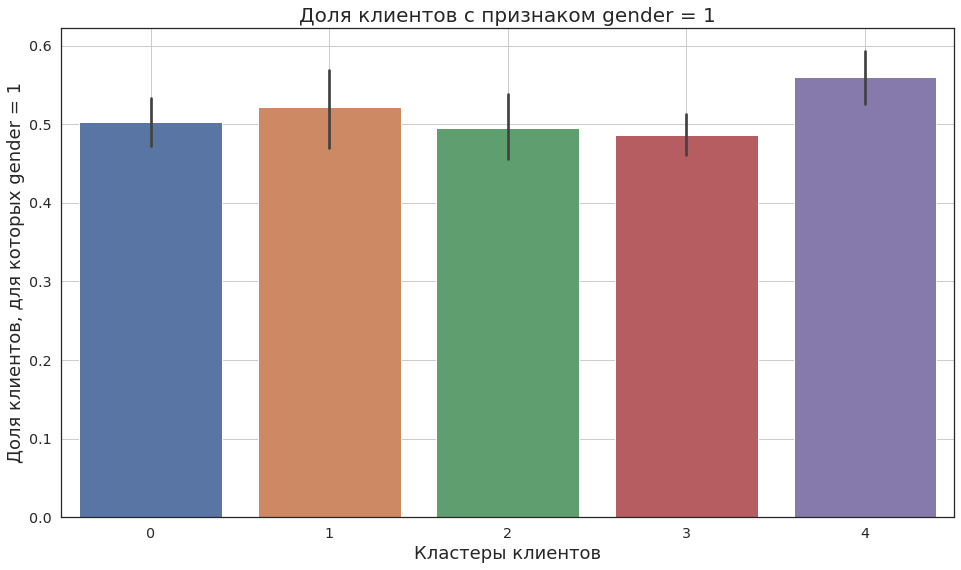

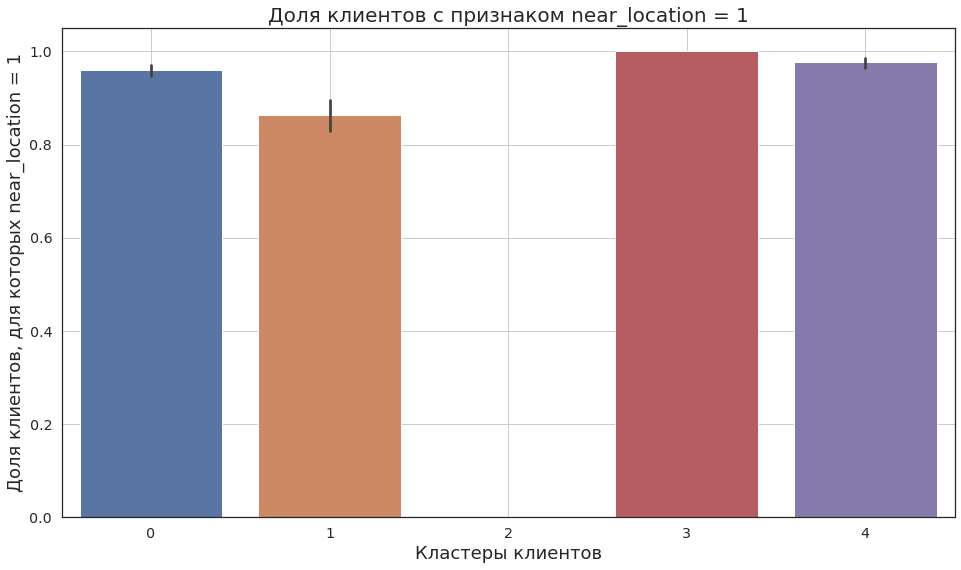

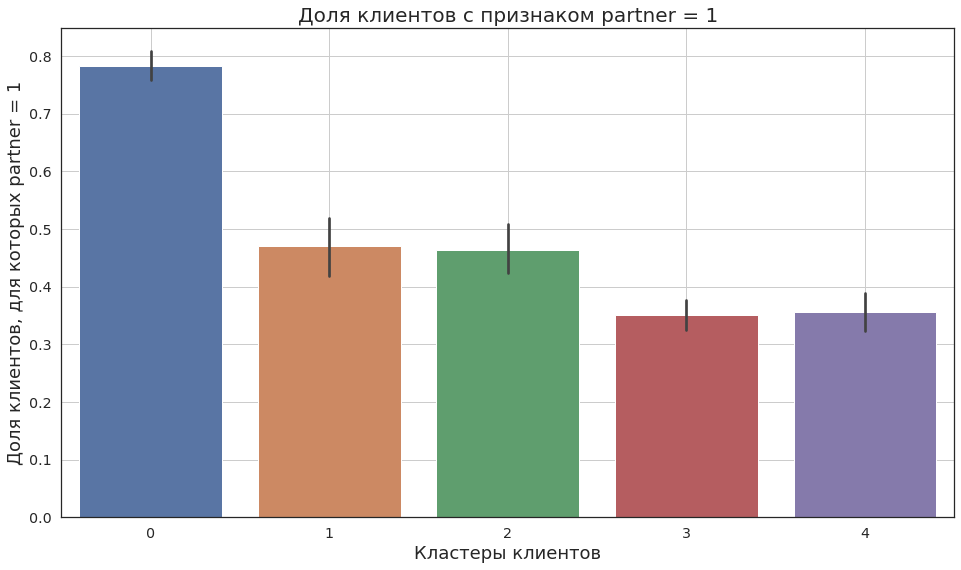

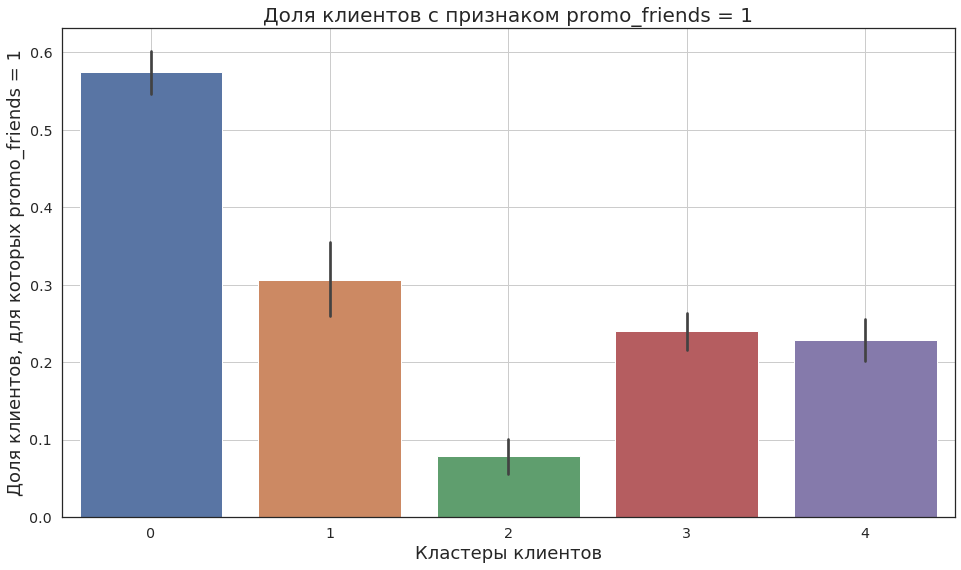

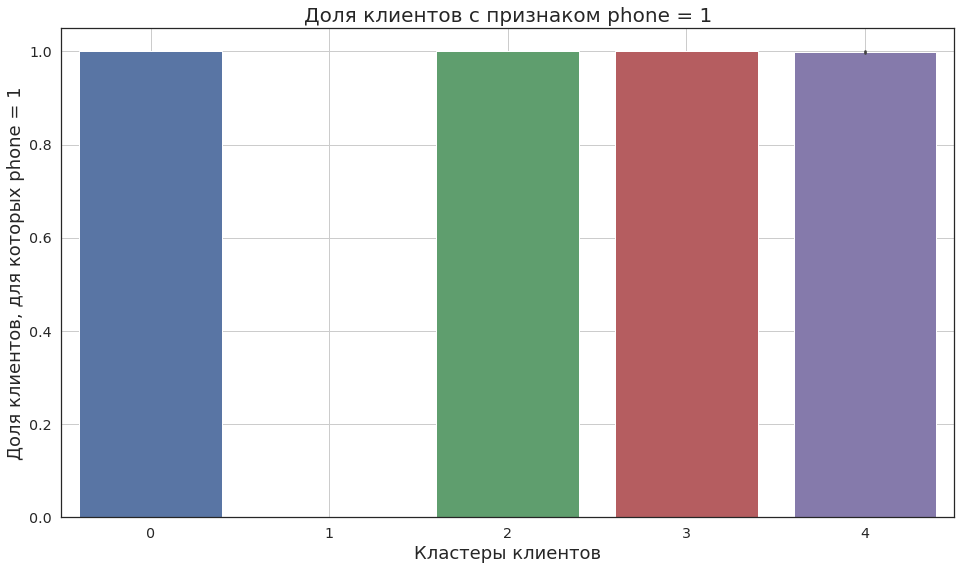

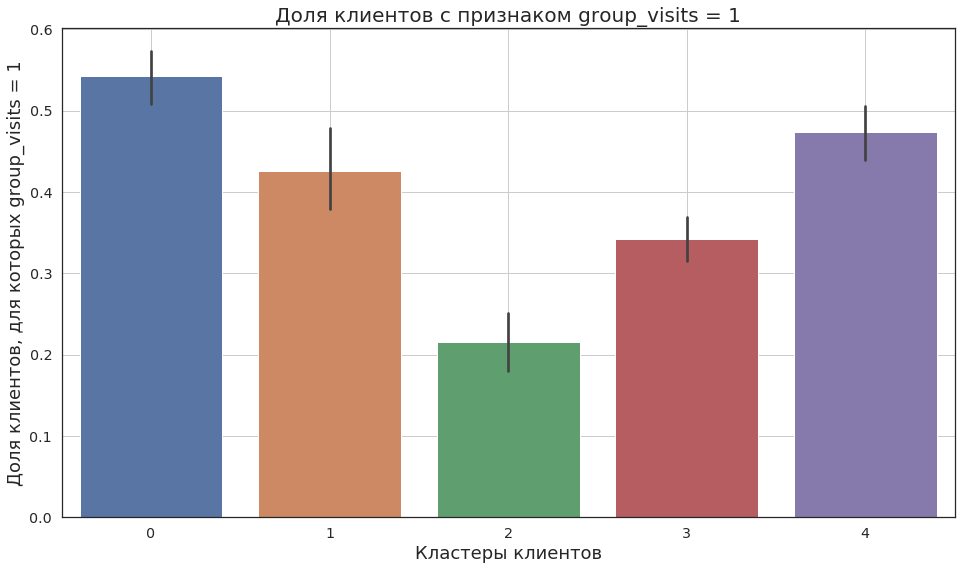

In [21]:
# В цикле проходим по всем бинарным переменным и строим столбчатые диаграммы
for feature in binar_features:
    plt.figure(figsize=(16, 9))
    plt.rcParams['font.size'] = '15'

    sns.barplot(x=df['cluster_km'], y=feature, data=df)

    plt.title('Доля клиентов с признаком %s = 1' %feature, fontsize=20)
    plt.ylabel('Доля клиентов, для которых %s = 1' %feature, fontsize=18)
    plt.xlabel('Кластеры клиентов', fontsize=18)
    plt.grid()

    plt.show()

Среди особенностей можно отметить, что во второй кластер попали клиенты, у которых поблизости нет ни дома, ни места работы. В нулевом кластере наибольшая доля клиентов-сотрудников компаний-партнеров. Однако, в четвертом кластере, где доля клиентов из оттока также невелика, доля клиентов, пришедших по партнерской программе наименьшая среди кластеров. Этот факт не подтверждает прямую связь партнерской программы и уменьшения доли уходящих со временем клиентов.

Также наблюдаем, что во втором кластере (с большой долей клиентов оттока - 44%) самая низкая доля клиентов, пришедших по рекомендации друзей, а также клиентов, посещавших групповые занятия. При разработке программы удержания клиентов, стоит постараться "воздействовать" на увеличение доли клиентов с такими признаками. Это может привести к уменьшению долю клиентов, попадающих в отток.

Теперь также в цикле построим распределения небинарных величин:

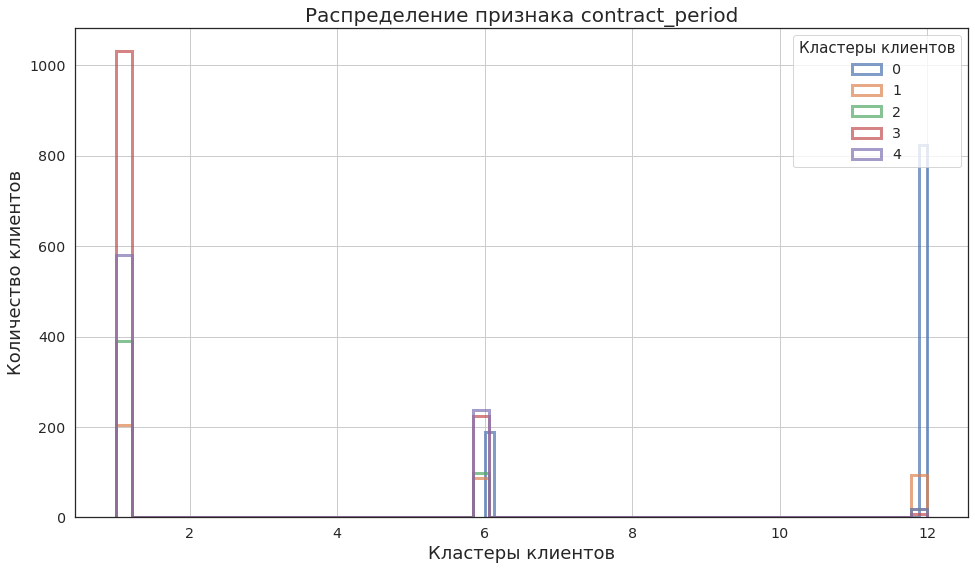

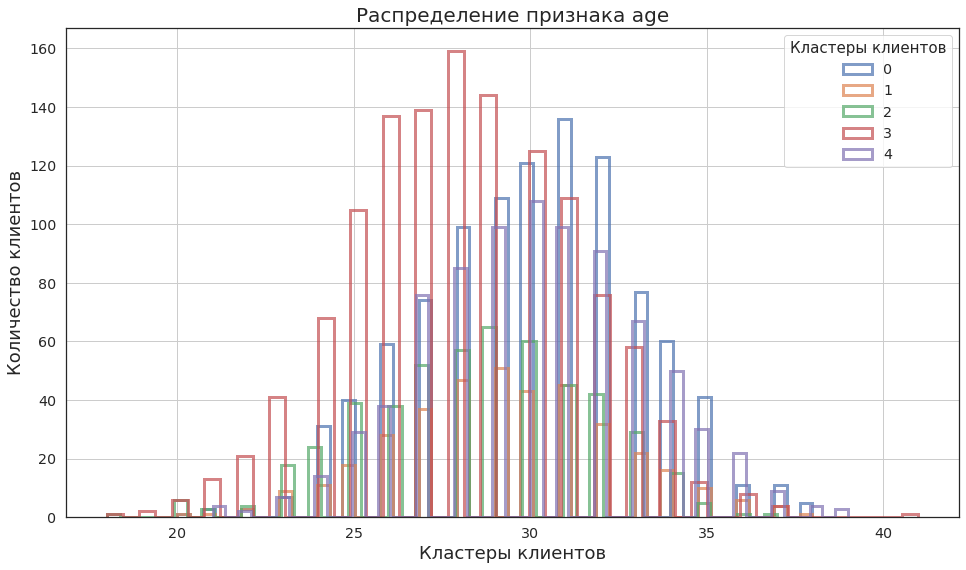

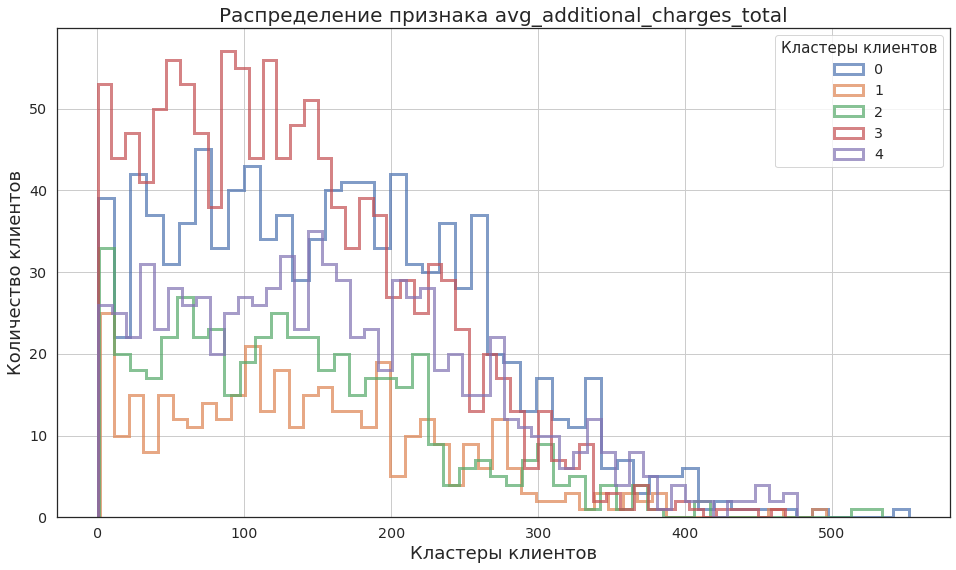

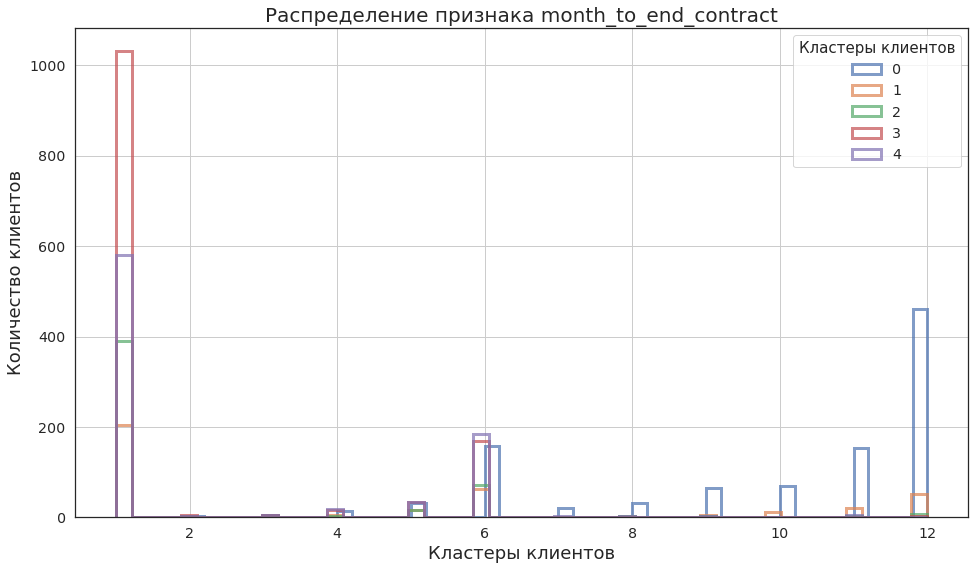

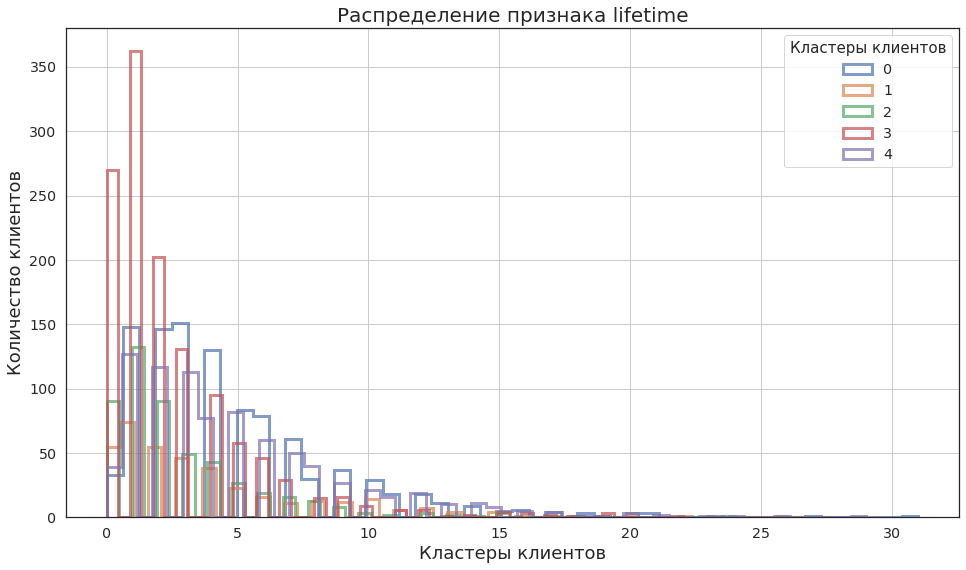

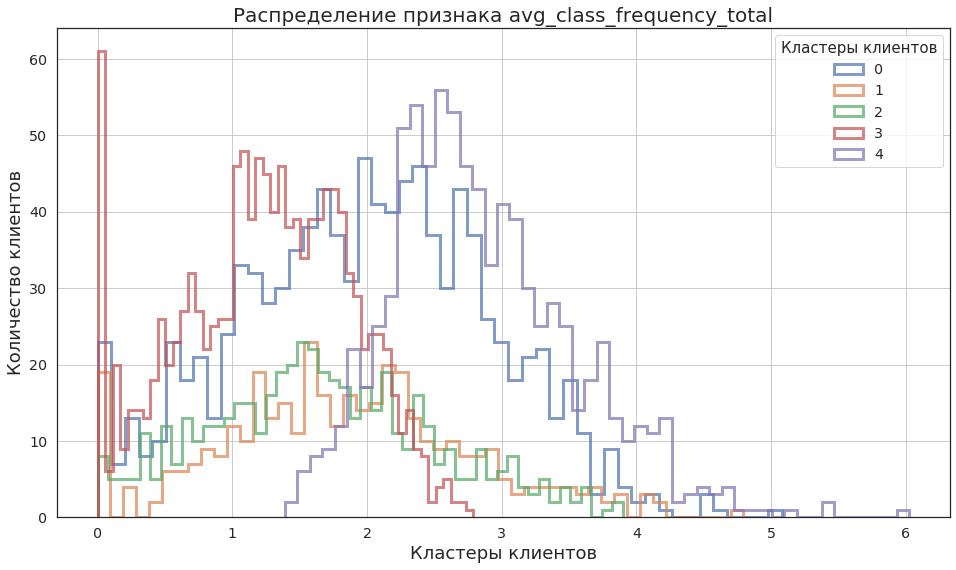

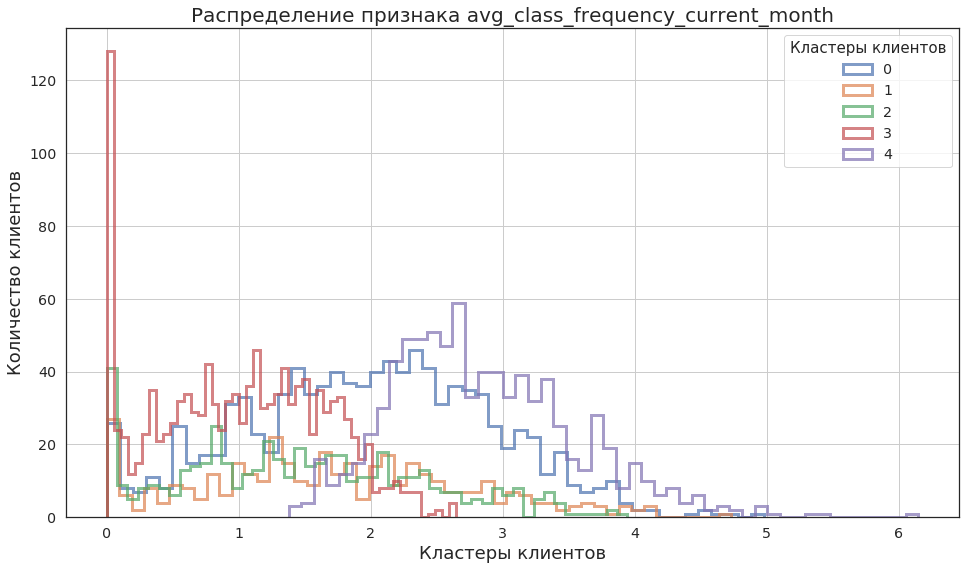

In [22]:
# В цикле построим графики распределений каждой переменной в двух группах клиентов: группе оттока и 
# группе клиентов, не попавших в отток.
for feature in not_binar_features:
    fig = plt.figure(figsize=(16, 9))
    
    for claster in range(0,5):
        
        # При построении распределения делам срез данных по лейблу кластера.
        sns.distplot(df[df['cluster_km']==claster][feature], kde=False, bins=50, 
                     hist_kws={'histtype': "step", 'linewidth': 3, 'alpha': 0.7})
        
    plt.legend(labels = [0, 1, 2, 3, 4], title = 'Кластеры клиентов', loc='upper right')
    plt.title('Распределение признака %s' %feature, fontsize=20)
    plt.ylabel('Количество клиентов', fontsize=18)
    plt.xlabel('Кластеры клиентов', fontsize=18)
    plt.grid()

    plt.show()

В нулевом кластере - самом "надежном" - больше всего число продаж абонементов длительного действия - на 12 месяцев. График распределения клиентов по возрасту указывает, что в третьем кластере (с наибольшим процентов оттока) средний возраст ниже, чем в других кластерах - поряка 28 лет. При привлечении новых клиентов стоит ориентироваться в первую очередь на клиентов 30-35 лет.

Распределение времени знакомства клиентов с компанией демонстрирует, что клинты из "менее надежных" кластеров - третьего и второго - в большинстве не остаются с компанией на долго. Отток происходит на первых месяцах посещения фитнес-центров.

Средняя частота посещения занятий заметно выше в кластерах 0 и 4, обладающих наименьшими долями оттока клиентов. Тех клиентов, кто часто ходит в фитнес-центр, скорее всего устраивают предлагаемые условия и услуги.

Подведем основные итоги раздела.

<a id='Выводы_4'></a>
### Выводы

Применяя алгоритмы обучения без учителя, мы осуществили кластеризацию клиентов по их признакам двумя способами: с помощью алгоритма агломеративной кластеризации и методом K-Means. При этом данные о признаках клиентов были предварительно стандартизованны.

Агломеративная кластеризация выделила в качестве рекомендаванных групп клиентов четыре кластера. Поскольку в задании проекта рекомендовывалось осуществить кластеризацию на пять групп, мы в параметрах метода K-Means далее задали именно такле число. К тому же, на построенной дендрограмме один из классов выглядел наиболее объемно, что служит косвенным обоснованием выбрать в качестве конечного числа клатеров пять групп.

После того, как мы реализовали кластеризацию клиентов фитнес-центров, было произведено сравнение средних показателей признаков клиентов между кластерами. Построены диаграммы и гистограммы распределений признаков в зависимости от номера кластера.

Среди отличий кластеров наблюдались следующие:

- Во второй кластер (с большой долей клиентов оттока - 44%) попали клиенты, у которых поблизости нет ни дома, ни места работы. Кроме того, здесь наблюдается самая низкая доля клиентов, пришедших по рекомендации друзей, а также клиентов, посещавших групповые занятия;


- В нулевом кластере - самом "надежном" (доля оттока 3%) - наибольшая доля клиентов-сотрудников компаний-партнеров. А также больше всего число продаж абонементов длительного действия - на 12 месяцев;


- В третьем кластере - с наибольшим процентом оттока (51%) - средний возраст ниже, чем в других кластерах - поряка 28 лет. При привлечении новых клиентов, возможно, стоит ориентироваться в первую очередь на клиентов 30-35 лет;


- Распределение времени знакомства клиентов с компанией демонстрирует, что клиенты из "менее надежных" кластеров - третьего и второго - в большинстве не остаются с компанией на долго. Отток происходит на первых месяцах посещения фитнес-центров;


- Средняя частота посещения занятий заметно выше в кластерах 0 и 4, обладающих наименьшими долями оттока клиентов.

Все эти факторы стоит учесть при разработке программы по удержанию клиентов. Так положительный эффект по уменьшению доли клиентов, прекращающих пользование услугами фитнес-центров, можно попытаться достичь предпринимая следующие действия:

1) Увеличить долю клиентов, пришедших по рекомендации знакомых (реферальная программа привлечения клиентов) и по партнерской программе из компании-работодателя (продолжать развивать партнерскую программу);

2) Рекламировать групповые занятия и абонементы длительного срока действия (на 12 месяцев);

3) При привлечении новых клиентов нацеливаться на возрастную категорию 30-35 лет, а также людей, регулярно бывающих в районах расположения фитнес-центов.

Основные рекомендации даны. Теперь охватим кратко все этапы данного проекта и сформулируем общий вывод.

<a id='Общий_вывод'></a>
## Общий вывод

В проекте ставилась задача определения признаков клиентов сети фитнес-центров, влияющих на их отток. А также выявление других возможных факторов и закономерностей. Необходимо было проанализировать анкеты посетителей и, основываясь на этих данных, дать рекомендации по разработке программы удержания клиентов.

На первом этапе проектра данные были импортированы в ноутбук из csv-файла, проверены на отсутсвие дубликатов и пропусков. Была изучена общая информация о датафрейме, проанализированы фигурирующие типы данных переменных. Названия переменных были приведены к единообразному виду.

Далее, на этапе проведения исследовательского анализа данных (EDA), были изучены характерные значения фигурирующих признаков клиентов, построены графики распределений параметров как для всей выборки клиентов, так и для подвыборок, отличающихся по значения фактора оттока клиента. Для оценки влияния различных признаков на фактор оттока клиентов была рассчитана и визуализирована матрица корреляций признаков посетителей фитнес-центров.
На этом этапе было выявлено, что фактор оттока клиентов более всего коррелирует с небольшим временем клиента в сети фитнес-центров (уходят чаще в первые месяцы знакомства с компанией), с редким посещением фитнес-центра в месяц оттока, с возрастом клиентов и с малым периодом действия абонемента.

На следующем шаге мы использовали алгоритмы машинного обучения с учителем для прогнозирования оттока клиентов по известным признакам. Тестировались два алгоритма: логическая регрессия и классификация случайным лесом. При этом данные о клиентах были разделены на подвыборки - обучающую и тестовую. Для уменьшения влияния выбросом ряда признаков, данные стандартизировались. Модели обучались, после чего их качество оценивалось на тестовой выборке. Были рассчитаны такие метрики моделей как доля правильных ответов, точность и полнота. По всем показателям лучше себя показала модель логической регрессии. Метрика полноты для этой модели составила 83%. Это говорит о том, что в 83% случаев мы сможем корректно спрогнозировать фактор потенциального оттока клиента.

Далее производилась кластеризация клиентов алгоритмами обучения без учителя. Были рассмотрены алгоритмы агломеративной кластеризации и кластеризации K-Means. С помощью первого алгоритма, основанном на построении матрицы попарных расстояний между признаками клиентов, было рассчитано возможное число кластеров для решаемой задачи. Далее по заданному числу кластеров была произведена кластеризация клиентов более быстрым алгоритмом K-Means. Полученные кластеры клиентов сравнивались между собой по характерным значениям и распределениям признаков. Среди пяти кластеров было выделено два - с лейблами 0 и 4 - с наименьшей долей клиентов оттока. А также кластеры 2 и 3, где доля оттока клиентов достигала 44% и 51%, соответственно. Сравнение кластеров позволило выделить особенности в различии признаков клиентов, относящихся к разным кластерам, и выдвинуть предположения о связи ряда признаков с фактором оттока клиентов. Так кластерам с высоким процентом оттока присущи более низкий средний возраст клиентов, по сравнению с "надежными" кластерами, небольшой процент клиентов, пришедших по рекомендации, редкое посещение групповых занятий, отсутствие рядом места жительства или работы.

Учитывая наблюдаемые закономерности, был предложен ряд рекомендации по удержанию клиентов и снижению показателя оттока:

1) Продолжать развивать реферальную программу привлечения клиентов и партнерскую программу для компаний-работодатей;

2) Рекламировать групповые занятия и абонементы длительного срока действия (на 12 месяцев);

3) При привлечении новых клиентов нацеливаться на возрастную категорию 30-35 лет, а также людей, регулярно бывающих в районах расположения фитнес-центов.